기상자료개방포털 홈페이지 https://data.kma.go.kr 강수량, 전운량, 황사 발생일수 등 기상과 관련된 다양한 데이터가 존재
상단 메뉴에서 기후통계분석 → 기후분석을 선택하고 
조건별통계 페이지에서 기온 정보를 알고 싶은 지역과 기간을 설정하여
‘지역별 기온 데이터’를 CSV 다운로드로 내려받습니다.
pandas  라이브러리를 이용하여 다음 데이터를 찾는 코드를 작성하시오



In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
fm.get_fontconfig_fonts()
font_location = 'font/malgunsl.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
#matplotlib.rc('font', family=font_name)
rc('font', family=font_name)



In [171]:
#1번 서울지역의 2000년도~2018년도  날씨 데이터로부터  가장 기온이 낮았던 날짜와 기온 출력
temp_df = pd.read_csv("./datas/서울기온데이터_일별.csv", encoding="cp949")
temp_df

temp_min = temp_df['최저기온(℃)'] == temp_df['최저기온(℃)'].min()
temp_min_day = temp_df[temp_min]
temp_max = temp_df['최고기온(℃)'] == temp_df['최고기온(℃)'].max()
temp_max_day = temp_df[temp_max]

print("2000년도 ~ 2018년도 최저기온 : {0}(℃) ,  날짜 : {1} " .format(df['최저기온(℃)'].min(), temp_min_day['일시'].values))
print("2000년도 ~ 2018년도 최고기온 : {0}(℃) ,  날짜 : {1} " .format(df['최고기온(℃)'].max(), temp_max_day['일시'].values))

2000년도 ~ 2018년도 최저기온 : -18.6(℃) ,  날짜 : ['2001-01-15'] 
2000년도 ~ 2018년도 최고기온 : 39.6(℃) ,  날짜 : ['2018-08-01'] 


In [170]:
#2번 서울지역의  2000년도~2018년도 날씨 데이터로부터  강수량이 가장 많았던 날짜와 기온 출력
rain_df = pd.read_csv("./datas/서울강수량_일별.csv", encoding="cp949")
rain_df

heavy_rain = rain_df['강수량(mm)'] == rain_df['강수량(mm)'].max()
heavy_rain_day = rain_df[heavy_rain]

print("2000년도 ~ 2018년도 최고강수량 : {0}mm ,  날짜 : {1} " .format(rain_df['강수량(mm)'].max(), heavy_rain_day['일시'].values))

2000년도 ~ 2018년도 최고강수량 : 301.5mm ,  날짜 : ['2011-07-27'] 


In [216]:
#3번  서울지역의 2000년도~2018년도 날씨 데이터로부터 년도별 가장 높은 날의 기온과  년도별 가장 높은 날의 기온을 변화를 쉽게 파악할 수 있도록  시각화하시오?? 강수량? 기온?
%matplotlib inline
year_temp = pd.read_csv("./datas/서울연도별기온.csv", encoding="cp949")
year_temp_cor = year_temp[ ['일시','최고기온(℃)' , '최저기온(℃)']].drop(19)
year_temp_cor

,일시,최고기온(℃),최저기온(℃)
0,2000,35.1,-12.1
1,2001,35.3,-18.6
2,2002,34.8,-12.0
3,2003,32.2,-15.5
4,2004,36.2,-16.7
5,2005,35.0,-14.0
6,2006,34.7,-14.1
7,2007,33.2,-8.6
8,2008,35.4,-13.1
9,2009,34.4,-12.9


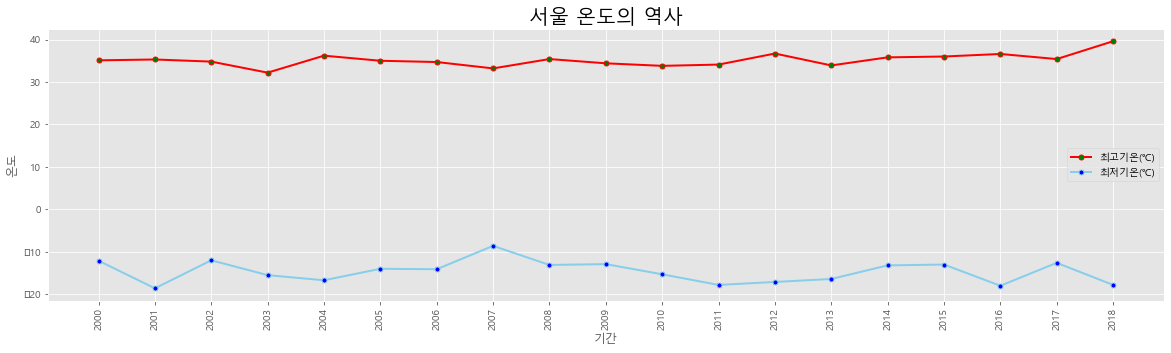

In [217]:
day = list(map(str,range(2000,2019)))

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))   
ax = fig.add_subplot(1, 1, 1)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('온도', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(day, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)


# axe 객체에 plot 함수로 그래프 출력
ax.plot(day, year_temp_cor['최고기온(℃)'], marker='o', markerfacecolor='green', 
        markersize=5, color='red', linewidth=2, label='최고기온(℃)')

ax.plot(day, year_temp_cor['최저기온(℃)'], marker='o', markerfacecolor='blue', 
        markersize=5, color='skyblue', linewidth=2, label='최저기온(℃)')

#제목 추가
ax.set_title("서울 온도의 역사", size=20)

# 범례 표시
ax.legend(loc='best')



In [239]:
test_df = pd.read_csv("./datas/20230.csv", encoding="cp949", skiprows=11)
test_df

,\t\t지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,108,서울,2000-01,-2.1,1.7,9.9,2000-01-01,-5.7,-12.1,2000-01-07
1,108,서울,2000-02,-1.7,2.6,7.5,2000-02-19,-5.8,-11.6,2000-02-01
2,108,서울,2000-03,6.3,11.4,18.9,2000-03-27,1.7,-4.8,2000-03-08
3,108,서울,2000-04,11.9,16.9,23.5,2000-04-20,7.3,1.8,2000-04-11
4,108,서울,2000-05,17.5,22.7,30.5,2000-05-25,12.9,7.9,2000-05-02
...,...,...,...,...,...,...,...,...,...,...
235,108,서울,2019-08,27.2,31.6,36.8,2019-08-06,23.6,18.5,2019-08-31
236,108,서울,2019-09,22.6,27.1,30.5,2019-09-16,19.0,13.6,2019-09-19
237,108,서울,2019-10,16.4,21.8,28.2,2019-10-01,11.8,4.7,2019-10-27
238,108,서울,2019-11,7.6,12.9,22.1,2019-11-03,3.1,-4.6,2019-11-20
